<style>
    @media print{
        body {
            position:relative !important;
        }
        .celltag_new_page {
            page-break-before: always !important;
        }
    }
</style>
<div hidden>
    $$
    \newcommand{\reals}{\mathbb{R}}
    \newcommand{\naturals}{\mathbb{N}}
    \newcommand{\integers}{\mathbb{Z}}
    \newcommand{\prob}{\mathbb{P}}
    \newcommand{\expect}{\mathbb{E}}
    \newcommand{\b}[1]{\mathbf{#1}}
    \newcommand{\bs}[1]{\boldsymbol{#1}}
    \newcommand{\c}[1]{\mathcal{#1}}
    \newcommand{mat}[2]{\left[\,\begin{array}{#1}#2\end{array}\,\right]}
    $$
</div>

# COMPSCI 371 Homework 7

_**Group Members:**_

### Problem 0 (3 points)

## Part 1: The Gini Index 

### Problem 1.1 (Exam Style)

### Problem 1.2 (Exam Style)

### Problem 1.3 (Exam Style)

## Part 2: Basics of Decision Tree Classifiers

### Problem 2.1 (Exam Style)

In [220]:
1/8*(.6+.5+.8+.9+.3+.0+.1+.2)

0.42500000000000004

### Problem 2.2 (Exam Style)

### Problem 2.3 (Exam Style)

$$
i(S) = 
$$

$$
\begin{array}{ccccccc}
j & t & |L| & i_L & |R| & i_R & \delta &\text{best} \\\hline
 \\
\end{array}
$$

## Part 3: Regression Trees

In [221]:
import pickle
import numpy as np
from types import SimpleNamespace
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib import use
from matplotlib import colors, colormaps
plt.style.use('default')
%matplotlib inline

In [222]:
def bounding_box(xs, margin=0.05):
    mn, mx = np.min(xs, axis=0) - margin, np.max(xs, axis=0) + margin
    return SimpleNamespace(left=mn[0], right=mx[0], bottom=mn[1], top=mx[1])

In [223]:
def replace_side(box, side, value):
    new = dict(**box.__dict__)
    new[side] = value
    return SimpleNamespace(**new)

In [224]:
def shade_box(box, color):
    corner = box.left, box.bottom
    width, height = box.right - corner[0], box.top - corner[1]
    rectangle = Rectangle(corner, width, height,
                          edgecolor='none', facecolor=color)
    plt.gca().add_patch(rectangle)

In [225]:
def make_colormap(data):
    value_range = [np.minimum(0, np.min(data.y)), np.maximum(0, np.max(data.y))]
    half_range = max(-value_range[0], value_range[1])
    return SimpleNamespace(
        map=colormaps['RdYlBu'],
        norm=colors.CenteredNorm(vcenter=0, halfrange=half_range)
    )

In [226]:
def value_color(value, color_scheme):
    return np.squeeze(color_scheme.map(color_scheme.norm(value)))

In [227]:
def make_figure(box=None, fig_size=(6, 6)):
    if box is None:
        box = SimpleNamespace(left=0, right=1, bottom=0, top=1)
    plt.figure(figsize=fig_size, tight_layout=True)
    plt.plot((box.left, box.right, box.right, box.left, box.left),
             (box.bottom, box.bottom, box.top, box.top, box.bottom),
             lw=0.5, c='gray')
    plt.axis('square')
    plt.axis('off')
    return box

In [228]:
# import urllib.request
# import ssl
# from os import path as osp
# import shutil

# # same as zsh 
# # curl https://www2.cs.duke.edu/courses/fall25/compsci371/homework/7/regressor_data.pkl \
# #      --output regressor_data.pkl
# def retrieve(file_name, semester='fall25', homework=7):
#     if osp.exists(file_name):
#         print('Using previously downloaded file {}'.format(file_name))
#     else:
#         context = ssl._create_unverified_context()
#         fmt = 'https://www2.cs.duke.edu/courses/{}/compsci371/homework/{}/{}'
#         url = fmt.format(semester, homework, file_name)
#         with urllib.request.urlopen(url, context=context) as response:
#             with open(file_name, 'wb') as file:
#                 shutil.copyfileobj(response, file)
#         print('Downloaded file {}'.format(file_name))

In [229]:
regression_training_set_name = 'regressor_data.pkl'
retrieve(regression_training_set_name)

Using previously downloaded file regressor_data.pkl


In [230]:
with open(regression_training_set_name, 'rb') as file:
    regression_training_set = pickle.load(file)

In [231]:
color_map = make_colormap(regression_training_set)

In [232]:
regression_training_set
X = regression_training_set.x
y = regression_training_set.y

In [233]:
### Problem 3.1

In [234]:
color_map = make_colormap(regression_training_set)

In [235]:
def plot_data(data, color_scheme):
    plt.scatter(
        data.x[:, 0], data.x[:, 1], s=10,
        c=data.y, cmap=color_scheme.map, norm=color_scheme.norm
    )
    plt.colorbar(cmap=color_scheme.map, norm=color_scheme.norm, shrink=0.855)

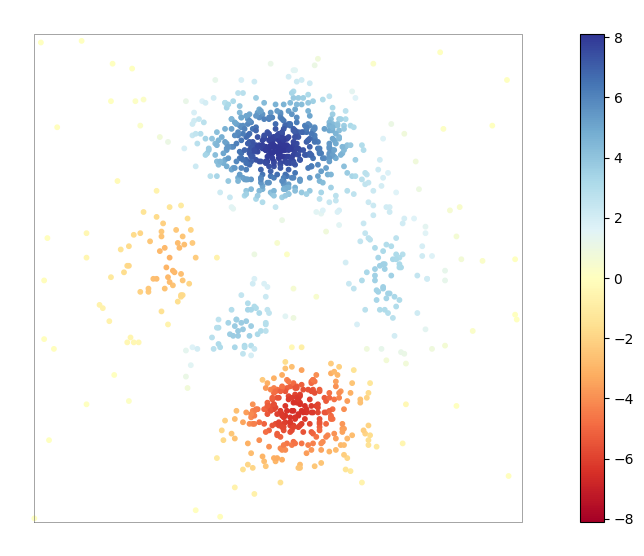

In [236]:
make_figure(fig_size=(7, 6))
plot_data(regression_training_set, color_map)
plt.show()

In [237]:
import sklearn
h = sklearn.tree.DecisionTreeRegressor()
h.fit(X,y)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


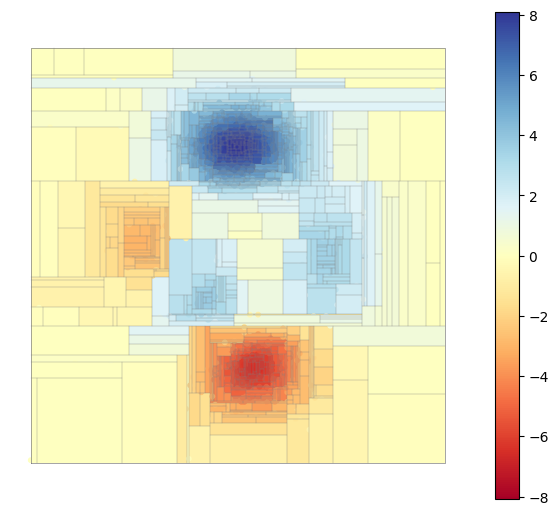

In [238]:
def draw_tree(t, b, color_scheme):
    def draw(node, box):
        if  t.children_left[node] == -1 \
        and t.children_right[node] == -1:
            shade_box(box, value_color(t.value[node], color_scheme))
            return
        plt.plot([(t.threshold[node], t.threshold[node]),(box.left, box.right)][t.feature[node]],
                 [(box.bottom, box.top),(t.threshold[node], t.threshold[node])][t.feature[node]],
                    lw = 0.25, c='gray')
        draw(t.children_left[node], replace_side(box,['right','top'][t.feature[node]],t.threshold[node]))
        draw(t.children_right[node], replace_side(box,['left','bottom'][t.feature[node]],t.threshold[node]))

    draw(0, b)
    plot_data(regression_training_set, color_map)

data_box = make_figure()
draw_tree(h.tree_, data_box, color_map)

## Part 4: Random Decision Forests

In [243]:
spiral_file = 'spiral.pkl'
retrieve(spiral_file)
with open(spiral_file, 'rb') as file:
    spiral = pickle.load(file)

Using previously downloaded file spiral.pkl


In [ ]:
tx = spiral.train.x
ty = spiral.train.y

sx = spiral.test.x
sy = spiral.test.y

(400, 2)

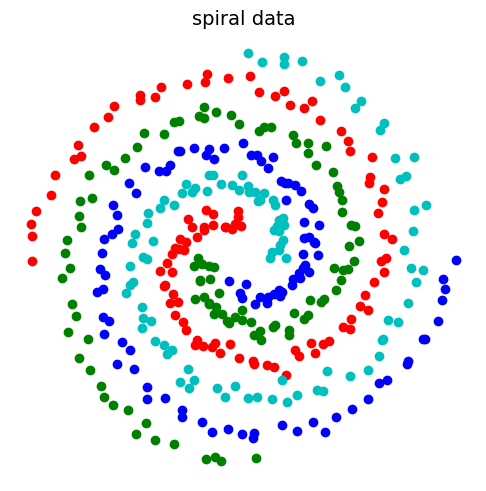

In [254]:
def draw_spiral(s):
    font_size = 14
    plt.figure(figsize=(5, 5), tight_layout=True)
    for m, color in enumerate(s.labels):
        select = s.train.y == m
        plt.scatter(s.train.x[select, 0],
                    s.train.x[select, 1],
                    c=color)
    plt.gca().set_aspect(1)
    plt.axis('off')
    plt.title('spiral data', fontsize=font_size)
    plt.draw()

draw_spiral(spiral)

In [262]:
from matplotlib.colors import ListedColormap

def coarse_regions(h, colors, step=0.01):
    xx, yy = np.meshgrid(np.arange(0, 1, step),
                         np.arange(0, 1, step))
    label = h.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    color_map = ListedColormap(colors)
    plt.contourf(xx, yy, label, cmap=color_map)

In [ ]:
h = sklearn.tree.DecisionTreeClassifier()
h.fit(tx,ty)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


70258.24s - name 'array' is not defined
Traceback (most recent call last):
  File "/Users/gordon/Documents/cs371/.venv/lib/python3.13/site-packages/debugpy/_vendored/pydevd/_pydevd_bundle/pydevd_vars.py", line 636, in change_attr_expression
    value = eval(expression, frame.f_globals, frame.f_locals)
  File "<string>", line 1, in <module>
NameError: name 'array' is not defined. Did you forget to import 'array'?


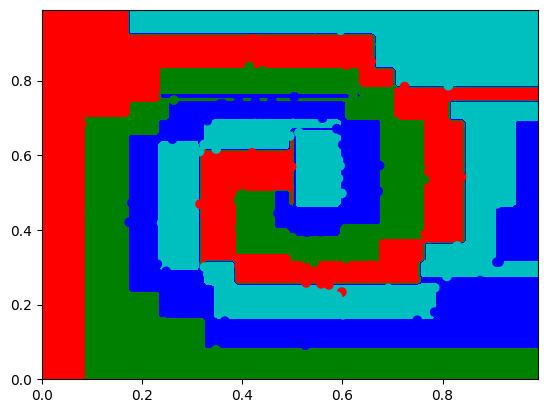

In [263]:
coarse_regions(h, spiral.labels)
plt.plot()
plt.scatter(tx[:,0],tx[:,1],c=np.array(spiral.labels)[ty])

### Problem 4.1

accuracy for 5 trees
91.125 %
out of bag score for 5 trees
65.25 %
accuracy for 500 trees
96.45 %
out of bag score for 500 trees
90.25 %


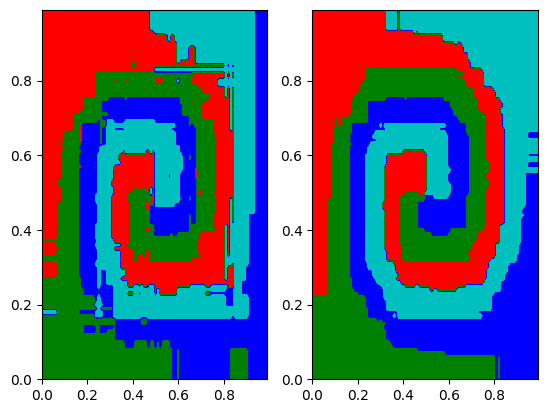

In [ ]:
import warnings


def addplot(n_estimators, subplot):
    h = sklearn.ensemble.RandomForestClassifier(
        n_estimators = n_estimators,
        max_depth = None,
        min_samples_split = 2,
        random_state = 0,
        oob_score = True
    )
    h.fit(tx,ty)

    plt.subplot(1,2,subplot)
    coarse_regions(h, spiral.labels)

    print(f'accuracy for {n_estimators} trees')
    print(np.round(sklearn.metrics.accuracy_score(sy,h.predict(sx)) * 100,3),'%')
    print(f'out of bag score for {n_estimators} trees')
    print(np.round(h.oob_score_ * 100,3),'%')

    warnings.catch_warnings()
    warnings.simplefilter('ignore')

addplot(5,1)
addplot(500,2)
plt.show()

### Problem 4.2 (Exam Style)

### unsure about 1.

1. Why is the OOB accuracy off when 5 trees are used? Be quantitative, and refer to the slides (not the notes) on trees and random forests for this part.

When $M=5$ the size of $T'$ is too small so OOB accuracy is lower.

$M=5$

$p=1-0.63^M=1-0.63^5=0.901$

$|T'|=\mu=pN=0.901\cdot 400=360.4<|T|=400$

2. How good is the OOB accuracy estimate with 500 trees? Compare it with the test accuracy.

OOB = $90.25\%$

test accuracy = $96.45\%$

OOB accuracy is just under test accuracy.

3.How do the two sets of decision regions (obtained with 5 and 500 trees) and the corresponding test accuracy values compare to each other, qualitatively?

- approximately equal spiral appearance of decision boundaries
- $M=5$ has rougher decision boundaries
- $M=500$ has smoother decision boundaries

- accuracy for $M=5$ is $91.125\%$
- accuracy for $M=500$ is $96.45\%$
- more trees is more accurate

- thus, smoother decision boundaries represent data better


In [283]:
p=1-0.63**5
N=400
((1-p)/(p*N))**(1/2)

0.016596545954348122

## Part 5: Trees vs. Forests 

In [241]:
mnist_file_name = 'full_mnist.pkl'
retrieve(mnist_file_name)

Using previously downloaded file full_mnist.pkl


In [242]:
with open(mnist_file_name, 'rb') as file:
    digits = pickle.load(file)

### Problem 5.1

### Problem 5.2 (Exam Style)

### Problem 5.3

### Problem 5.4 (Exam Style)